In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering , DBSCAN
from sklearn.metrics import silhouette_score as sil, silhouette_samples
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from google.colab import files
uploaded= files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [3]:
airline= pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
airline.rename(columns={"ID#":"ID","Award?":"Award"},inplace=True)
airline.set_index("ID",inplace=True)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [5]:
airline.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# **EDA**

In [6]:
total_null_col= airline.isnull().sum().value_counts(ascending=False)
total_null_row= airline.isnull().sum(axis=1).value_counts(ascending=False)
print('total_null_col:',total_null_col,"\n"'total_null_row:',total_null_row)

total_null_col: 0    11
dtype: int64 
total_null_row: 0    3999
dtype: int64


In [7]:
print('unique_cc1',airline.cc1_miles.unique())
print('unique_cc2',airline.cc2_miles.unique())
print('unique_cc3',airline.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [8]:
airline[airline.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [9]:
airline1= airline.drop_duplicates()
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [10]:
scaler = MinMaxScaler()
scaled_airline= scaler.fit_transform(airline1)
scaled_airline.shape

(3998, 11)

# **Hierarchical Clustering**

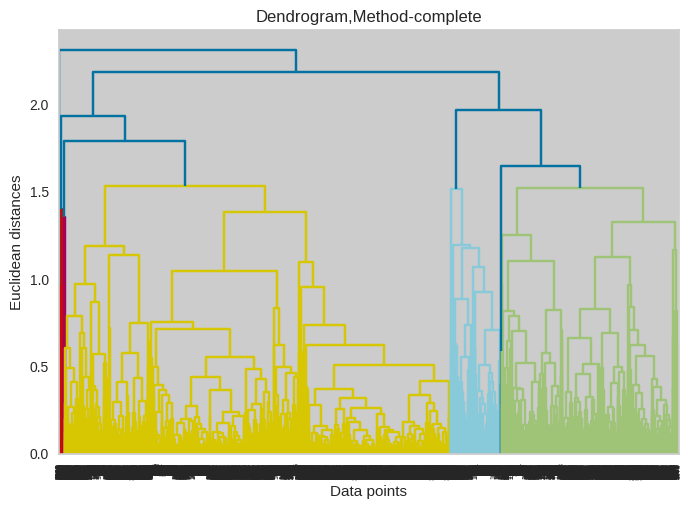

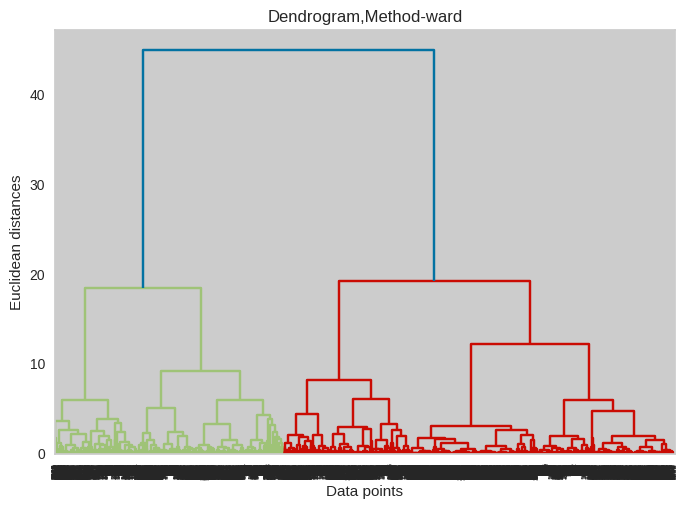

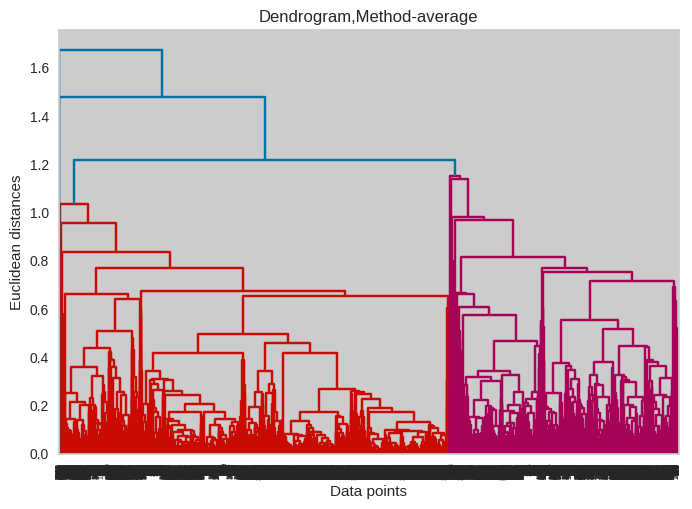

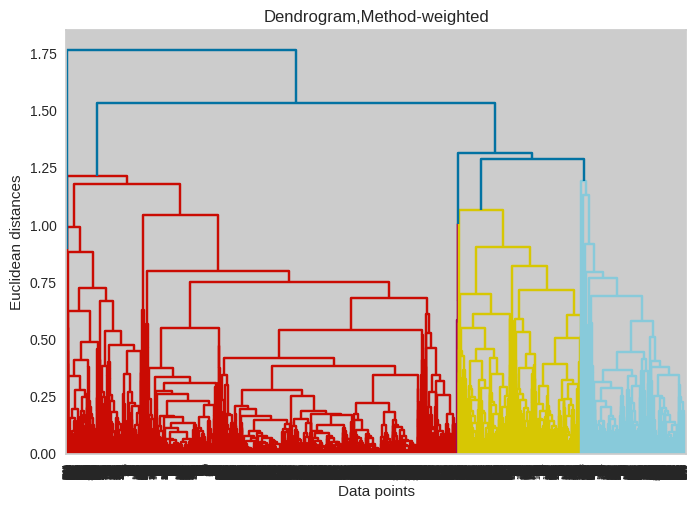

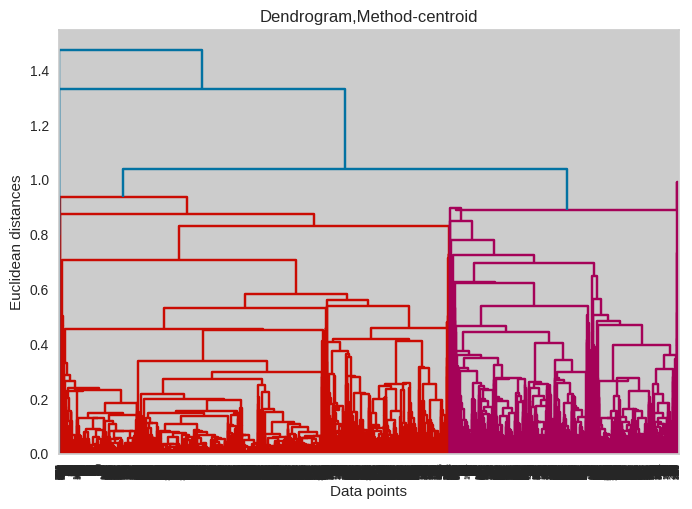

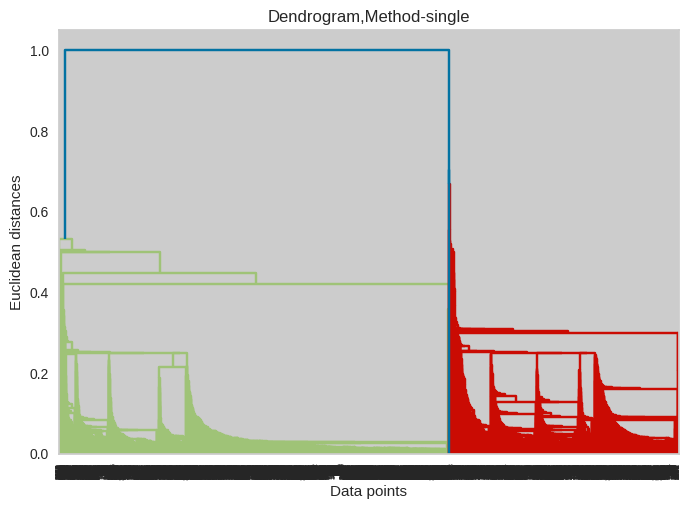

In [11]:
for methods in ["complete","ward","average","weighted","centroid","single"]:
  plt.title('Dendrogram,Method-{}'.format(methods))
  plt.xlabel('Data points')
  plt.ylabel('Euclidean distances')
  dendograms=sch.dendrogram(sch.linkage(scaled_airline, method=methods,optimal_ordering=False))
  plt.show()

# **Build The Model**

In [12]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        model = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        labels1 = model.fit_predict(scaled_airline)
        silhouette_score1 = sil(scaled_airline,labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535888544052936
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535888544052936

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4354523188194701
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318364582439801
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3961439228235289
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351186081149816

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42489181550394106
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4645451427805366
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5285595526639542
For n_

# **Conculsion**= The ward linakge method gives the highest silhouette score.

In [16]:
final_model= AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
final_model.fit(scaled_airline)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [26]:
final_model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [27]:
airline1['ClusterID']= final_model.labels_
airline1.head()

<ipython-input-27-affb4d2fe1c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline1['ClusterID']= final_model.labels_


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [28]:
grp= airline1.groupby(airline1["ClusterID"])
grp

In [29]:
for x,y in grp:
  print (y)
  print("______________________________________________________________________________________")

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
6       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
4014    39142           0          3          1          1        14981   
4015    11181           0          1          1          1          929   
4016     3974           0          1          1          1          365   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Fligh

In [30]:
grp.agg(["mean"])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ClusterID,,,,,,,,,,,
0,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,0.0
1,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


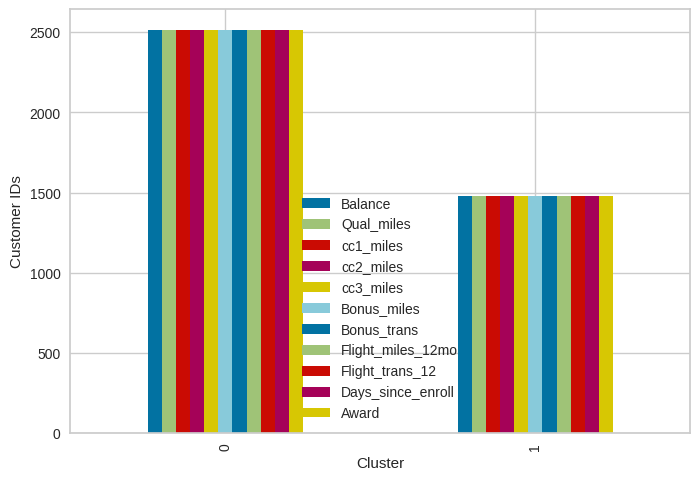

In [43]:
airline1.groupby(['ClusterID']).count().plot(kind='bar')
plt.xlabel("Cluster")                                         ##########plotng barplot to get number of customers in each cluster
plt.ylabel("Customer IDs")
plt.show()

# **Kmeans**

In [11]:
std_airline= StandardScaler()
std_a= std_airline.fit_transform(airline1)
std_a.shape

(3998, 11)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

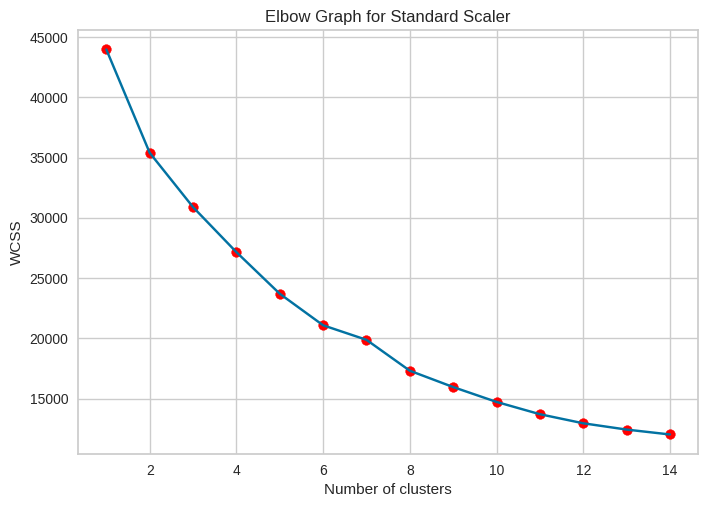

In [58]:
wcss=[]
for i in range(1,15):
  km=KMeans(n_clusters=i,random_state=42)
  km.fit(std_a)
  wcss.append(km.inertia_)

plt.plot(range(1,15),wcss)
plt.scatter(range(1,15),wcss,color="red")
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

After 8 the values doesnt change significantly so we can choose elbow at k=8

In [65]:
model_km= KMeans(n_clusters=8,random_state=42)
predict_km=model_km.fit(std_a)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
predict_km.labels_

array([0, 0, 0, ..., 6, 3, 3], dtype=int32)

In [68]:
airline1["ClusterId"]= predict_km.labels_
airline1

<ipython-input-68-9fb7b2309e9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline1["ClusterId"]= predict_km.labels_


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,6
4018,64385,0,1,1,1,981,5,0,0,1395,1,6
4019,73597,0,3,1,1,25447,8,0,0,1402,1,6


In [69]:
grp_km= airline1.groupby(["ClusterId"])

In [70]:
grp_km.agg(["mean"])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ClusterId,,,,,,,,,,,
0,59260.682004,32.635992,1.493865,1.000000,1.001022,6205.509202,8.430470,174.690184,0.528630,5631.406953,0.000000
1,138370.597561,61.925610,4.201220,1.000000,1.002439,50224.776829,19.959756,388.939024,1.180488,4957.047561,0.630488
2,199014.459016,520.221311,2.385246,1.000000,1.000000,36582.278689,29.844262,6137.696721,17.696721,4762.639344,0.819672
3,34696.397403,32.734199,1.255411,1.000000,1.000000,4452.483117,6.654545,150.701299,0.451948,2088.137662,0.000000
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,58169.349383,98.964198,1.695062,1.000000,1.000000,10584.520988,10.607407,421.613580,1.295062,4254.603704,1.000000
7,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273


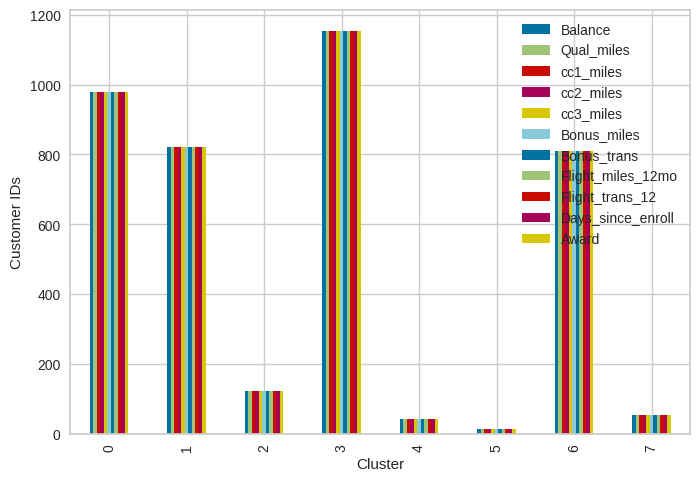

In [71]:
airline1.groupby(['ClusterId']).count().plot(kind='bar')
plt.xlabel("Cluster")                                         ##########plotng barplot to get number of customers in each cluster
plt.ylabel("Customer IDs")
plt.show()

# **DBSCAN**

In [21]:
eps_values= np.linspace(0.1,1,10)
min_sample_val= range(2,15)
best_min_samples = None
best_eps = None
best_score= -1
for eps in eps_values:
  for min_samples in min_sample_val:
    dbscan= DBSCAN(eps=eps,min_samples=min_samples,metric="euclidean")
    labels_db= dbscan.fit_predict(std_a)
    if len(np.unique(labels_db))>1:
      score_db= sil(std_a,labels_db)
      if score_db>best_score:
        best_score = score_db
        best_eps = eps
        best_min_samples = min_samples

print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)
print("Best silhouette score:", best_score)

Best eps: 1.0
Best min_samples: 8
Best silhouette score: 0.22185318044135646


In [22]:
final_dbscan= DBSCAN(eps=1,min_samples=8,metric="euclidean")
final_dbscan.fit(std_a)

DBSCAN(eps=1, min_samples=8)

In [23]:
final_dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [24]:
airline1["ClusterId"]= final_dbscan.labels_
airline1

<ipython-input-24-11f14470252b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline1["ClusterId"]= final_dbscan.labels_


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [26]:
grp_db= airline1.groupby(["ClusterId"])

In [27]:
grp_db.agg("mean")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ClusterId,,,,,,,,,,,
-1,175182.919937,880.422292,2.675039,1.073783,1.076923,37981.133438,21.240188,2063.221350,5.960754,4703.254317,0.66876
0,52641.182135,3.685839,1.654466,1.000000,1.000000,8968.847059,8.407843,112.526797,0.371242,3793.725926,0.00000
1,58403.466351,6.659716,2.581043,1.000000,1.000000,22452.773460,12.739336,253.072986,0.798104,4489.313744,1.00000
2,28365.363636,0.000000,1.000000,2.000000,1.000000,8825.272727,11.818182,22.727273,0.181818,2702.000000,0.00000


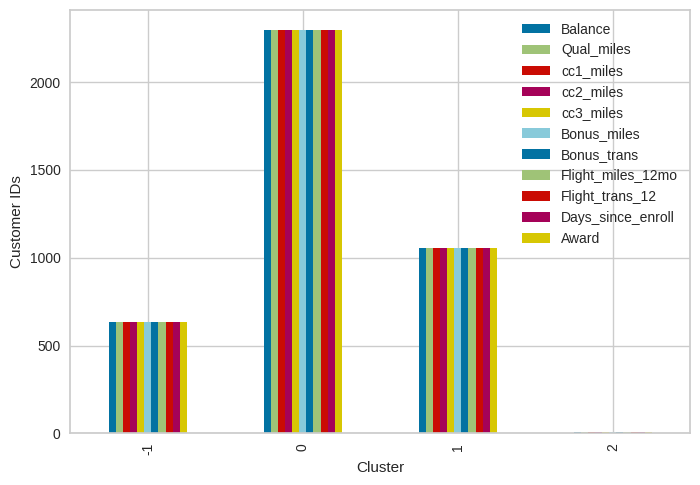

In [28]:
airline1.groupby(['ClusterId']).count().plot(kind='bar')
plt.xlabel("Cluster")                                         ##########plotng barplot to get number of customers in each cluster
plt.ylabel("Customer IDs")
plt.show()

# **-1 are the noise points in our dataset and the rest are the clusters**